Standart olan kütüphaneleri import etme, veri setlerini çağırma ve gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

5-PointPlot isimli dökümanda point plot ile görselleştirme gerçekleştirmiştim. Orada lise mezuniyeti ile fakirlik oranını karşılaştırarak aralarında bir ilişki bulmak amaçlanmıştı. Fakirlik oranı arttıkça liseden mezun olma oranının azaldığını gözlemlemiştik. Bunu başka yöntemlerle plot ettirerek daha güzel sonuçlar alabilmemiz mümkün. Şimdi aynı sorunu join plot ile görselleştirelim.

Sorunumuzu hatırlayalım: Eyaletler arasındaki lisededen mezun olma oranı ile fakirlik oranının karşılaştırılmasıdır.

In [5]:
#barPlot1 dökümanı
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

In [6]:
#barPlot2 dökümanı
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [7]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

In [8]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)

In [9]:
data.sort_values('area_poverty_ratio',inplace=True)

In [10]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


data değişkeninde tutulan veri setinde fakirlik oranları ve liseden mezun olma oranları bulunmakta.

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


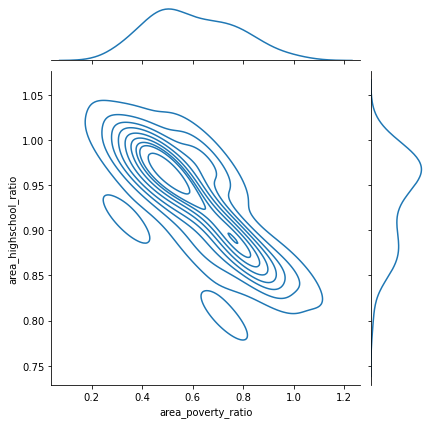

In [15]:
g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=6)
plt.savefig('graph.png')
plt.show()

g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7) satırında x ekseni fakirlik oranı ve y ekseni liseden mezun olma oranını ifade eder. size parametresi ile plot'un büyüklüğü belirlenir.

Çıktıyı inceleyelim. y ekseni liseden mezun olma oranını ve x ekseni fakirlik oranını ifade eder. Sağ üst köşede görebileceğiniz pearsonr=-0.81 ifadesinin anlamı şudur: pearsonr, iki tane feature arasında yani x ve y eksenleri arasıdanki korelasyonu yani ilişkiyi gösterir. Eğer pearsonr katsayısı 1 ise positive correlation var demektir. Eğer pearsonr katsayısı -1 ise negative correlation var demektir. Eğer pearsonr katsayısı 0 ise correlation yok demektir. 

Figürün etrafındaki mavi çizgiler kind="kde" parametresindeki kde dir. Bunu şöyle düşünebiliriz, fakirlik oranı (area_poverty_ratio) figürün üst kısmındaki mavi çizgi gibi önce yükselerek sonra azalmıştır. Fakirlik oranının en yüksek değerinin bu mavi çizgiye bakarak 0.5 olduğunu anlayabiliriz. Ve en yüksek 0.5 değeri olduğuna göre en çok 0.5 değerinin mevcut olduğunu anlayabiliriz. 

Sağ taraftaki çizgiye bakarsakta liseden mezun olma oranının en yüksek olduğu kısım 0.95 değerine karşılık geliyor. Yani insanların %95'i liseden mezun oluyormuş. 

Bir diğer join plot yöntemi:

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


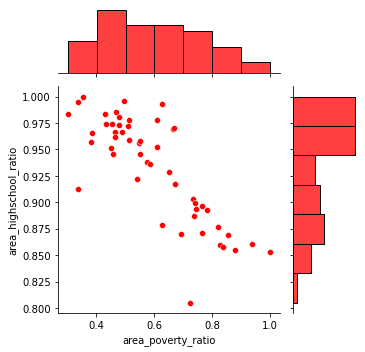

In [16]:
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=3, color="r")

seaborn'un data parametresine kendi data'mızı eşitlediğimiz için sütun isimlerini yukarıda gördüğünüz gibi string şeklinde yazabiliriz. area_poverty_ratio x eksenini ve area_highschool_ratio y eksenini ifade eder.

size parametresi ile plot'un büyüklüğü ayarlanır.

ratio=3 parametresinin anlamı: noktalı kısım 3 birim yer kaplar ve bar'ların olduğu kısım 1 yer kaplar.

color="r" parametresi ile rengin kırmızı olması sağlanmıştır.

Çıktıyı inceleyelim. area_poverty_ratio arttıkça liseden mezun olma oranı azalıyor. Yani burada ters orantı var. pearsonr=-0.81 ve bunun anlamı ters orantının -0.81 değerinde olduğudur. 

Figürün üst kısmındaki barlara bakın ve orada en uzun bar 0.5 değerine karşılık geliyor. Bunun anlamı, verisetinde area_poverty_ratio sütunu içerisinde en çok 0.5 değeri bulunmaktaymış.